In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
import time
import seaborn as sns

from statlearning import plot_regressions
from statlearning import plot_histogram

from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
tic = time.time()

sns.set_context('notebook')
sns.set_style('ticks')
crayon = ['#4E79A7', '#F28E2C', '#E15759', '#76B7B2', '#59A14F',
          '#EDC949', '#AF7AA1', '#FF9DA7', '#9C755F', '#BAB0AB']
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (9, 6)
%matplotlib inline

In [3]:
df = pd.read_csv("NBA_Train.csv")
df

,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,2.489530,PF,Houston Rockets,22,76,2078,19.1,0.577,9.2,...,7.0,1.3,3.5,8.2,18.3,119,105,4.6,2.7,7.3
1,2,2.433333,PG,Utah Jazz,24,73,1490,13.2,0.510,1.6,...,28.8,1.7,0.1,14.3,19.0,105,109,1.2,1.2,2.3
2,3,20.158622,SF,Oklahoma City Thunder,25,81,3122,29.8,0.635,2.2,...,26.7,1.7,1.5,12.2,33.0,123,104,14.8,4.4,19.2
3,4,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,...,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3
4,5,1.500000,PG,Brooklyn Nets,21,48,489,8.3,0.446,2.6,...,20.4,2.7,0.2,20.9,17.4,90,110,-0.4,0.3,-0.1
5,6,2.854940,PF,Miami Heat,33,46,653,10.5,0.523,8.4,...,2.9,0.9,2.0,12.7,13.9,104,105,0.3,0.8,1.1
6,7,1.252440,SF,Detroit Pistons,22,43,395,6.7,0.460,3.2,...,4.3,1.1,0.2,9.4,15.4,93,108,-0.2,0.3,0.2
7,8,6.300000,PG,Brooklyn Nets,30,80,2252,11.5,0.498,1.1,...,22.7,1.3,0.8,14.8,17.8,102,110,0.9,1.4,2.3
8,9,15.514031,SG,New Orleans Pelicans,25,64,2057,14.9,0.540,1.7,...,16.6,1.9,0.5,12.8,23.2,105,113,2.0,0.5,2.5
9,10,12.000000,PG,Toronto Raptors,27,79,2862,20.1,0.567,3.6,...,34.7,2.2,0.4,13.4,22.9,118,106,8.4,3.3,11.7


## Data Preprocessing

### Useless Columns

In [4]:
df.drop(columns="Train_ID", inplace=True)

### Missing value

In [5]:
df.isnull().sum()

SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

### Outliers

In [6]:
def _scatter(df, feature, target):
    """

    """
    # plt.figure(figsize=(16,8))
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)

    items = [feature, " vs ", target]
    title = ''.join(items)
    plt.title(title)


def subplot_scatter(df, target):
    """
    Plot scatter figures of each column in the dataFrame. 
    Args:
        df: pandas.DataFrame 
            DataFrame input.

        target: pandas.Series()
            Target column.


    """

    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns.drop(target))
    for i, col in enumerate(df.columns.drop(target)):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        _scatter(df, col, target)


def subplot_box(df):
    """

    """

    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        sns.boxplot(x=df[col])


def zscore_drop_missing(df, col_list, THRESHOLD=3):
    """
    """
    for col in col_list:
        z = np.abs(stats.zscore(df[col]))
        df = df[(z < THRESHOLD)]

    df.index = range(len(df))
    return df




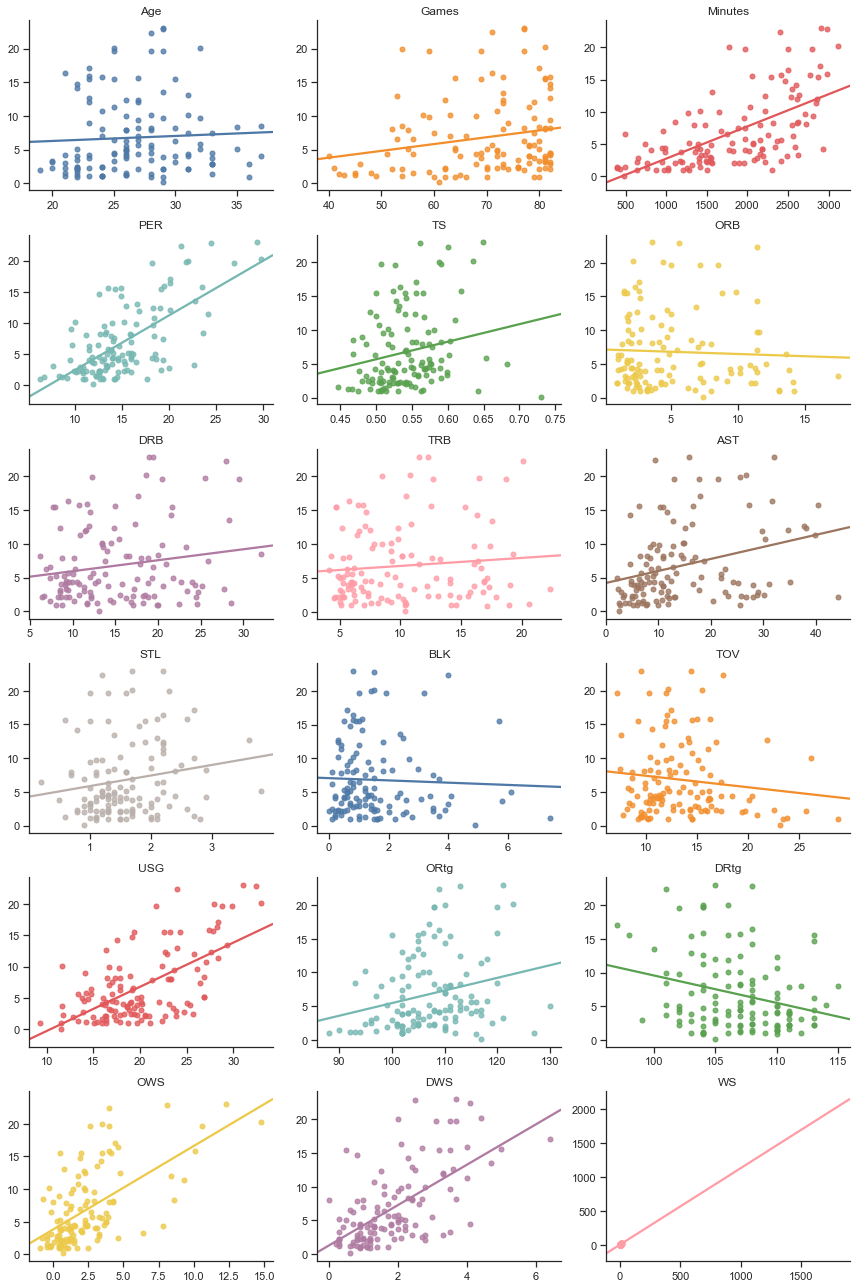

In [7]:
col_category = ["POSITION", "TEAM"]
col_number = df.columns.drop(["TEAM", "POSITION","SALARY"])


# subplot_scatter(df, "SALARY")

with sns.color_palette(crayon):
    plot_regressions(df[col_number], df["SALARY"])
    plt.show()

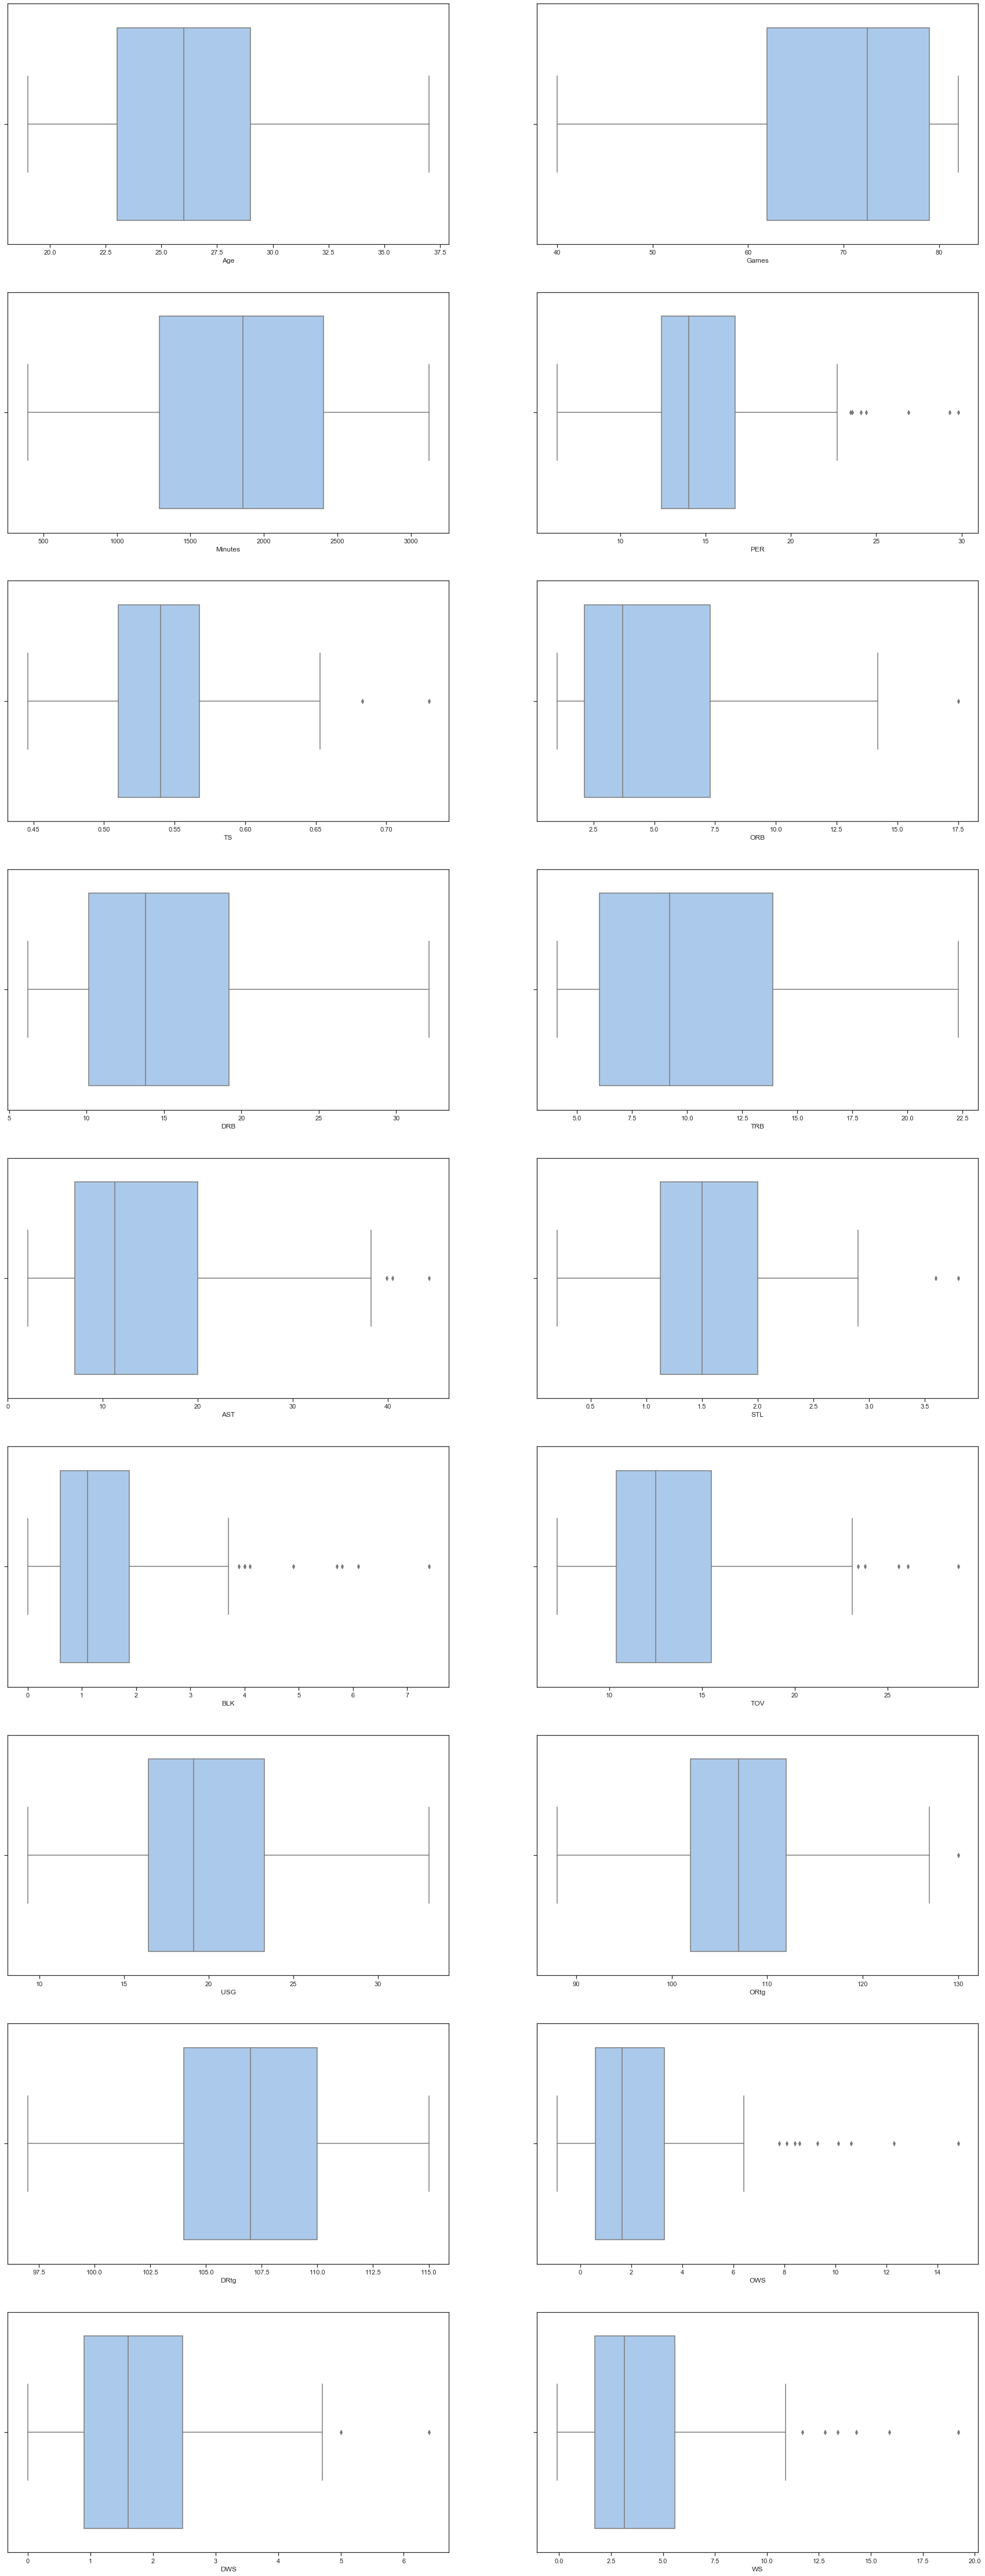

In [8]:
subplot_box(df[col_number])

In [9]:
#"SALARY"
df = zscore_drop_missing(df, [col_number], THRESHOLD=3.5)

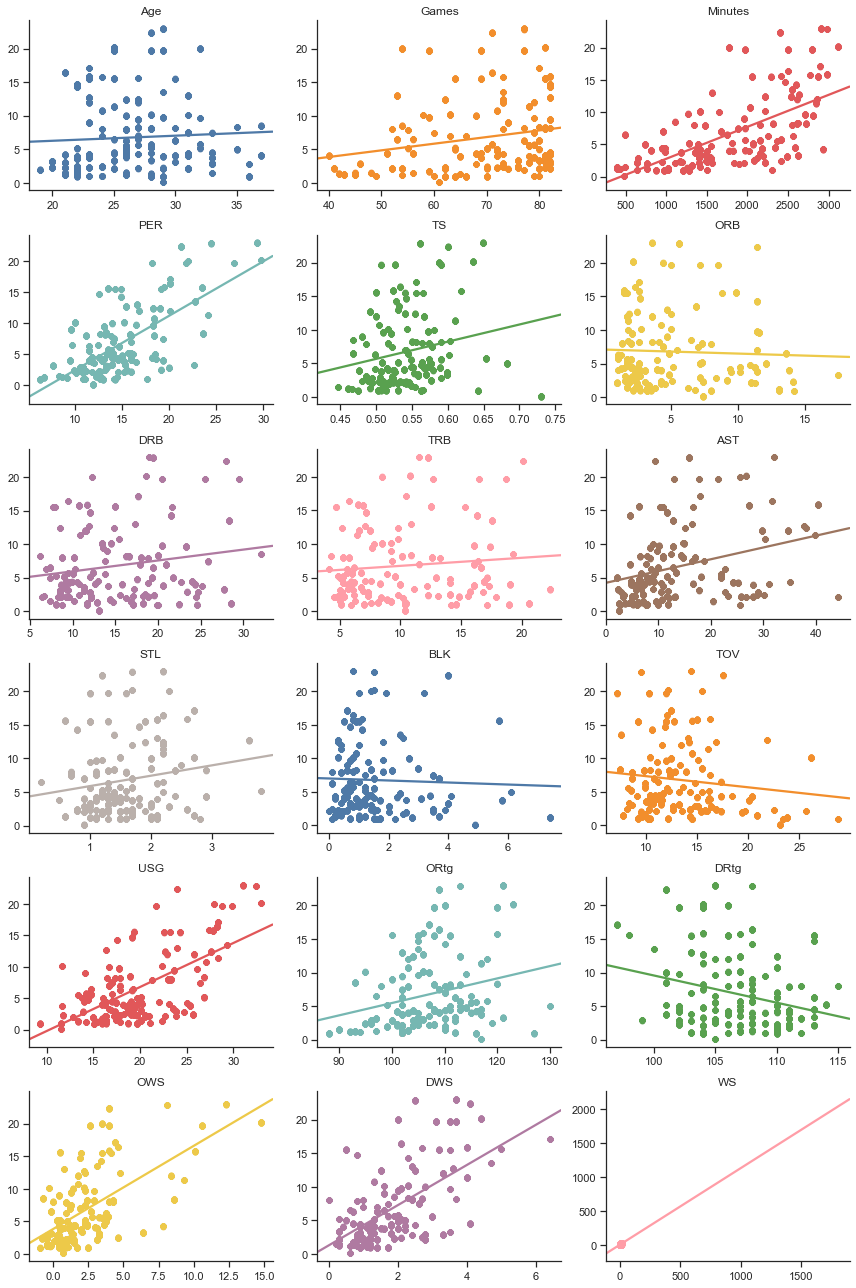

In [10]:
# subplot_scatter(df, "SALARY")
with sns.color_palette(crayon):
    plot_regressions(df[col_number], df["SALARY"])
    plt.show()

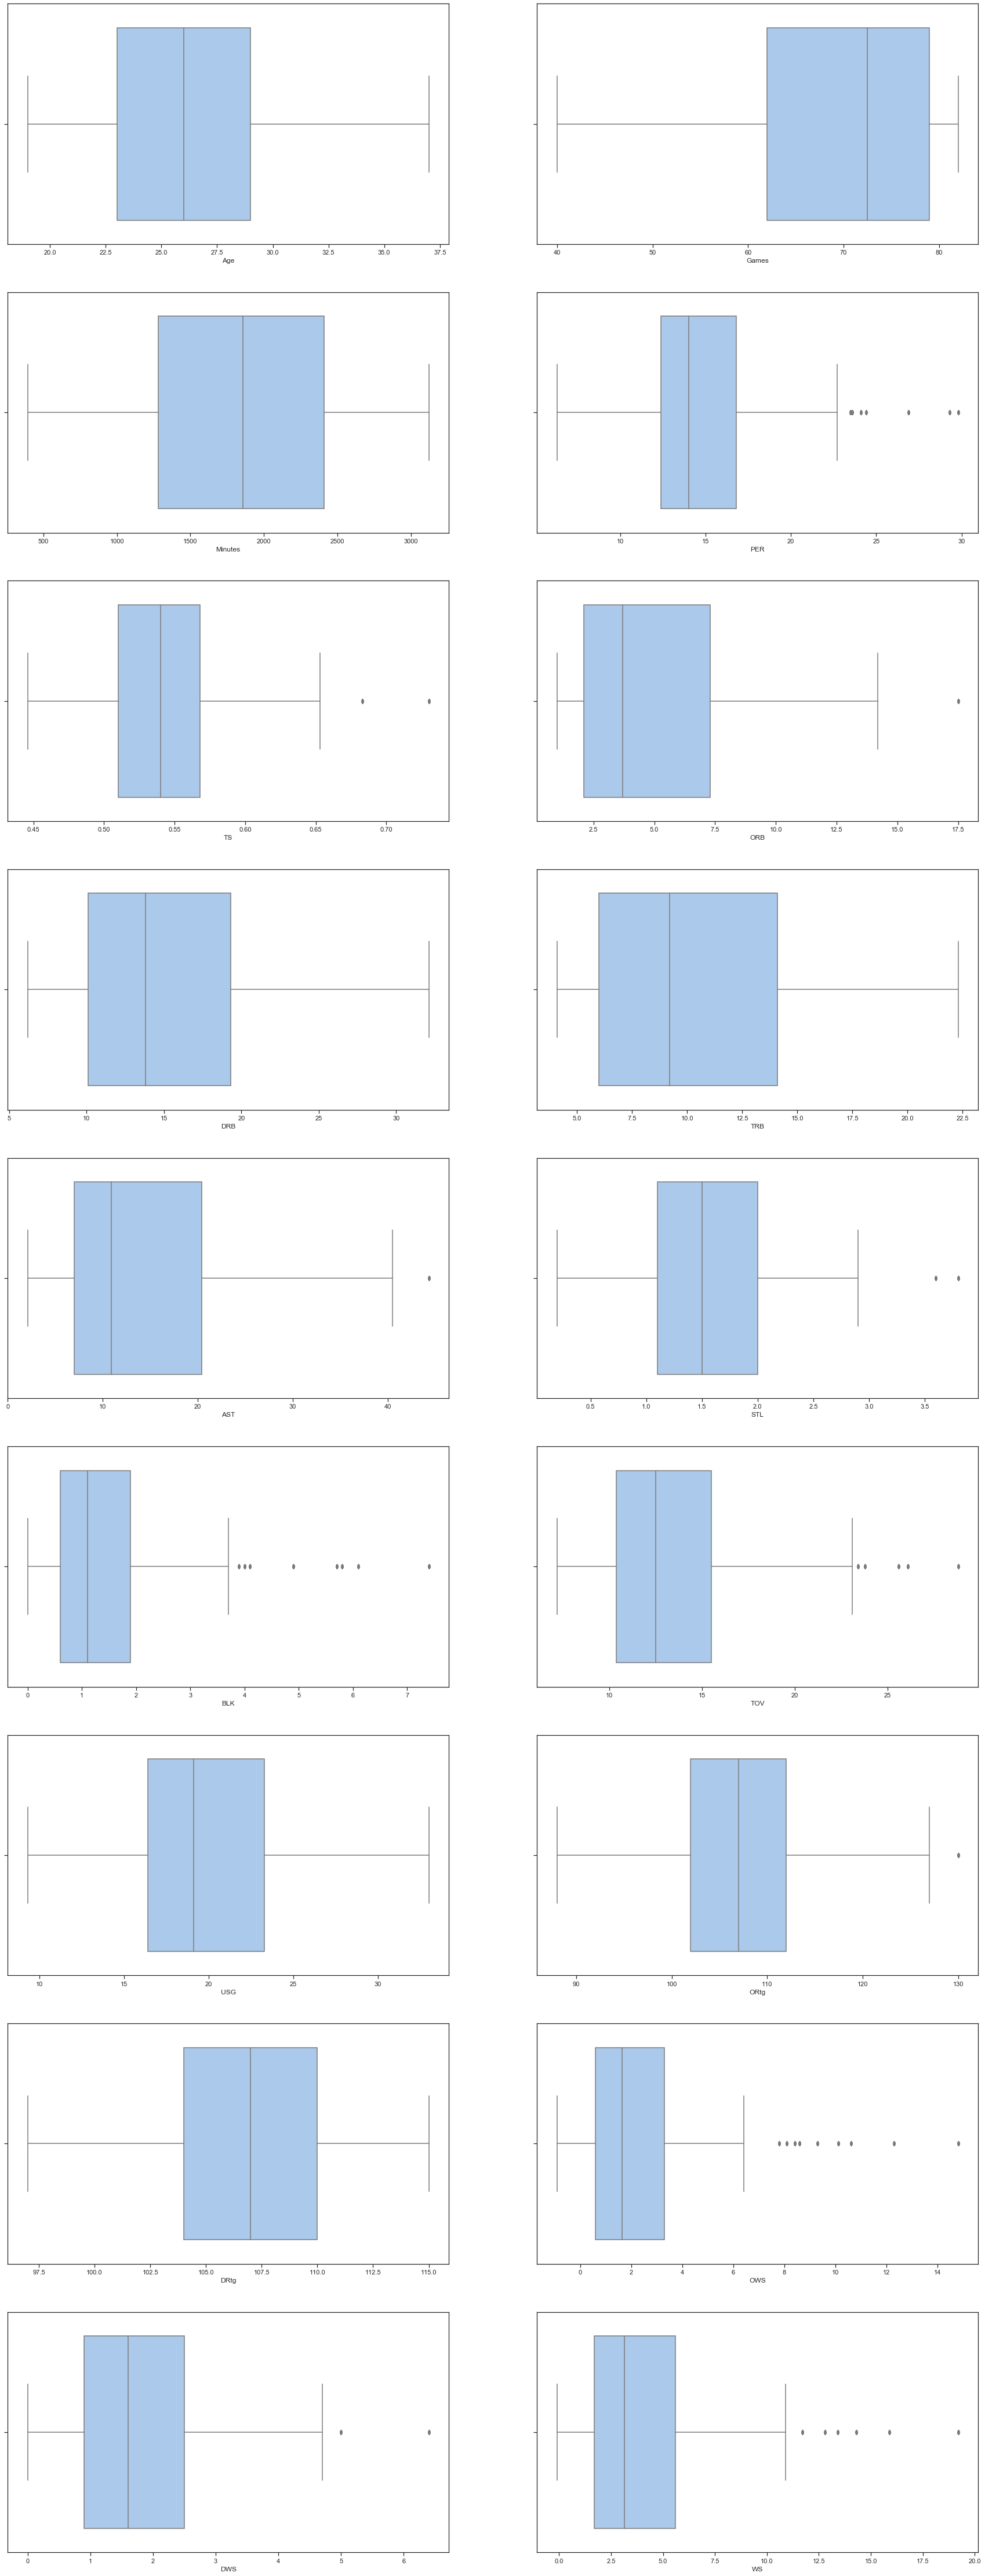

In [11]:
subplot_box(df[col_number])

### Normalization

In [12]:
normalized  = lambda x: (x - x.min()) * (1-0) / (x.max()-x.min())

normalized(df[col_number])

,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
1,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
2,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
3,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
4,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
5,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
6,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
7,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
8,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420
9,0.166667,0.857143,0.617442,0.544681,0.461268,0.496970,0.474903,0.549451,0.116114,0.305556,0.472973,0.046296,0.379747,0.738095,0.444444,0.350318,0.421875,0.383420


## Exploratory data analysis (EDA)

In [13]:
def get_status(x):
    return pd.DataFrame([x.count(), x.mean(), x.std(), x.min(), x.quantile(.25), x.quantile(.5), x.quantile(.75), x.max(), x.median(), x.mad(), x.var(), x.std(), x.skew(), x.kurt(), ],
                        index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median', 'mad', 'var', 'std', 'skew', 'kurt', ]).round(3)


def plot_distributed(series):
    
    sns.distplot(series, fit=norm, bins=10, color='cornflowerblue')
    (mu, sigma) = norm.fit(series)
    plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(
        mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+series.name)

def subplot_distributed(df):
    """

    """
    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        
        plot_distributed(df[col])

def plot_prob(series):
    stats.probplot(series,plot=plt)
    

def subplot_prob(df):
    """

    """
    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        plot_prob(df[col])
        


### Target Variable

In [14]:
get_status(df["SALARY"])

,0
count,2260.000
mean,6.769
std,5.604
min,0.111
25%,2.381
50%,4.500
75%,9.639
max,22.970
median,4.500
mad,4.508


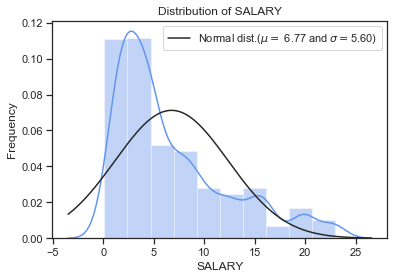

In [15]:
plot_distributed(df["SALARY"])

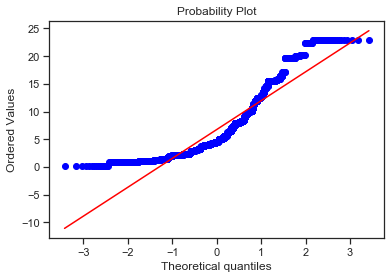

In [16]:
plot_prob(df["SALARY"])

In [17]:
get_status(np.log(df["SALARY"]))

,0
count,2260.000
mean,1.547
std,0.918
min,-2.194
25%,0.867
50%,1.504
75%,2.266
max,3.134
median,1.504
mad,0.740


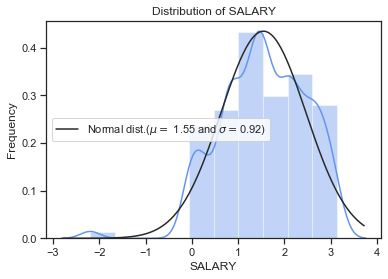

In [18]:
plot_distributed(np.log(df["SALARY"]))

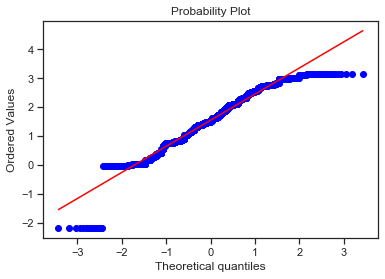

In [19]:
plot_prob(np.log(df["SALARY"]))

### Numerical Variables

In [20]:
df_eda = normalized(df[col_number])
get_status(df_eda)

,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000
mean,0.427,0.702,0.519,0.368,0.339,0.252,0.344,0.331,0.293,0.385,0.205,0.290,0.451,0.457,0.549,0.205,0.287,0.221
std,0.226,0.271,0.256,0.181,0.160,0.231,0.232,0.253,0.232,0.170,0.182,0.191,0.208,0.179,0.203,0.165,0.183,0.174
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.222,0.524,0.326,0.260,0.225,0.067,0.151,0.104,0.116,0.250,0.081,0.148,0.300,0.333,0.389,0.096,0.141,0.093
50%,0.389,0.774,0.537,0.328,0.331,0.164,0.293,0.280,0.209,0.361,0.149,0.245,0.414,0.452,0.556,0.162,0.250,0.168
75%,0.556,0.929,0.738,0.447,0.430,0.382,0.506,0.549,0.434,0.500,0.257,0.384,0.591,0.571,0.722,0.268,0.391,0.295
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
median,0.389,0.774,0.537,0.328,0.331,0.164,0.293,0.280,0.209,0.361,0.149,0.245,0.414,0.452,0.556,0.162,0.250,0.168
mad,0.184,0.227,0.220,0.138,0.123,0.191,0.196,0.215,0.187,0.135,0.133,0.147,0.170,0.142,0.167,0.115,0.146,0.129


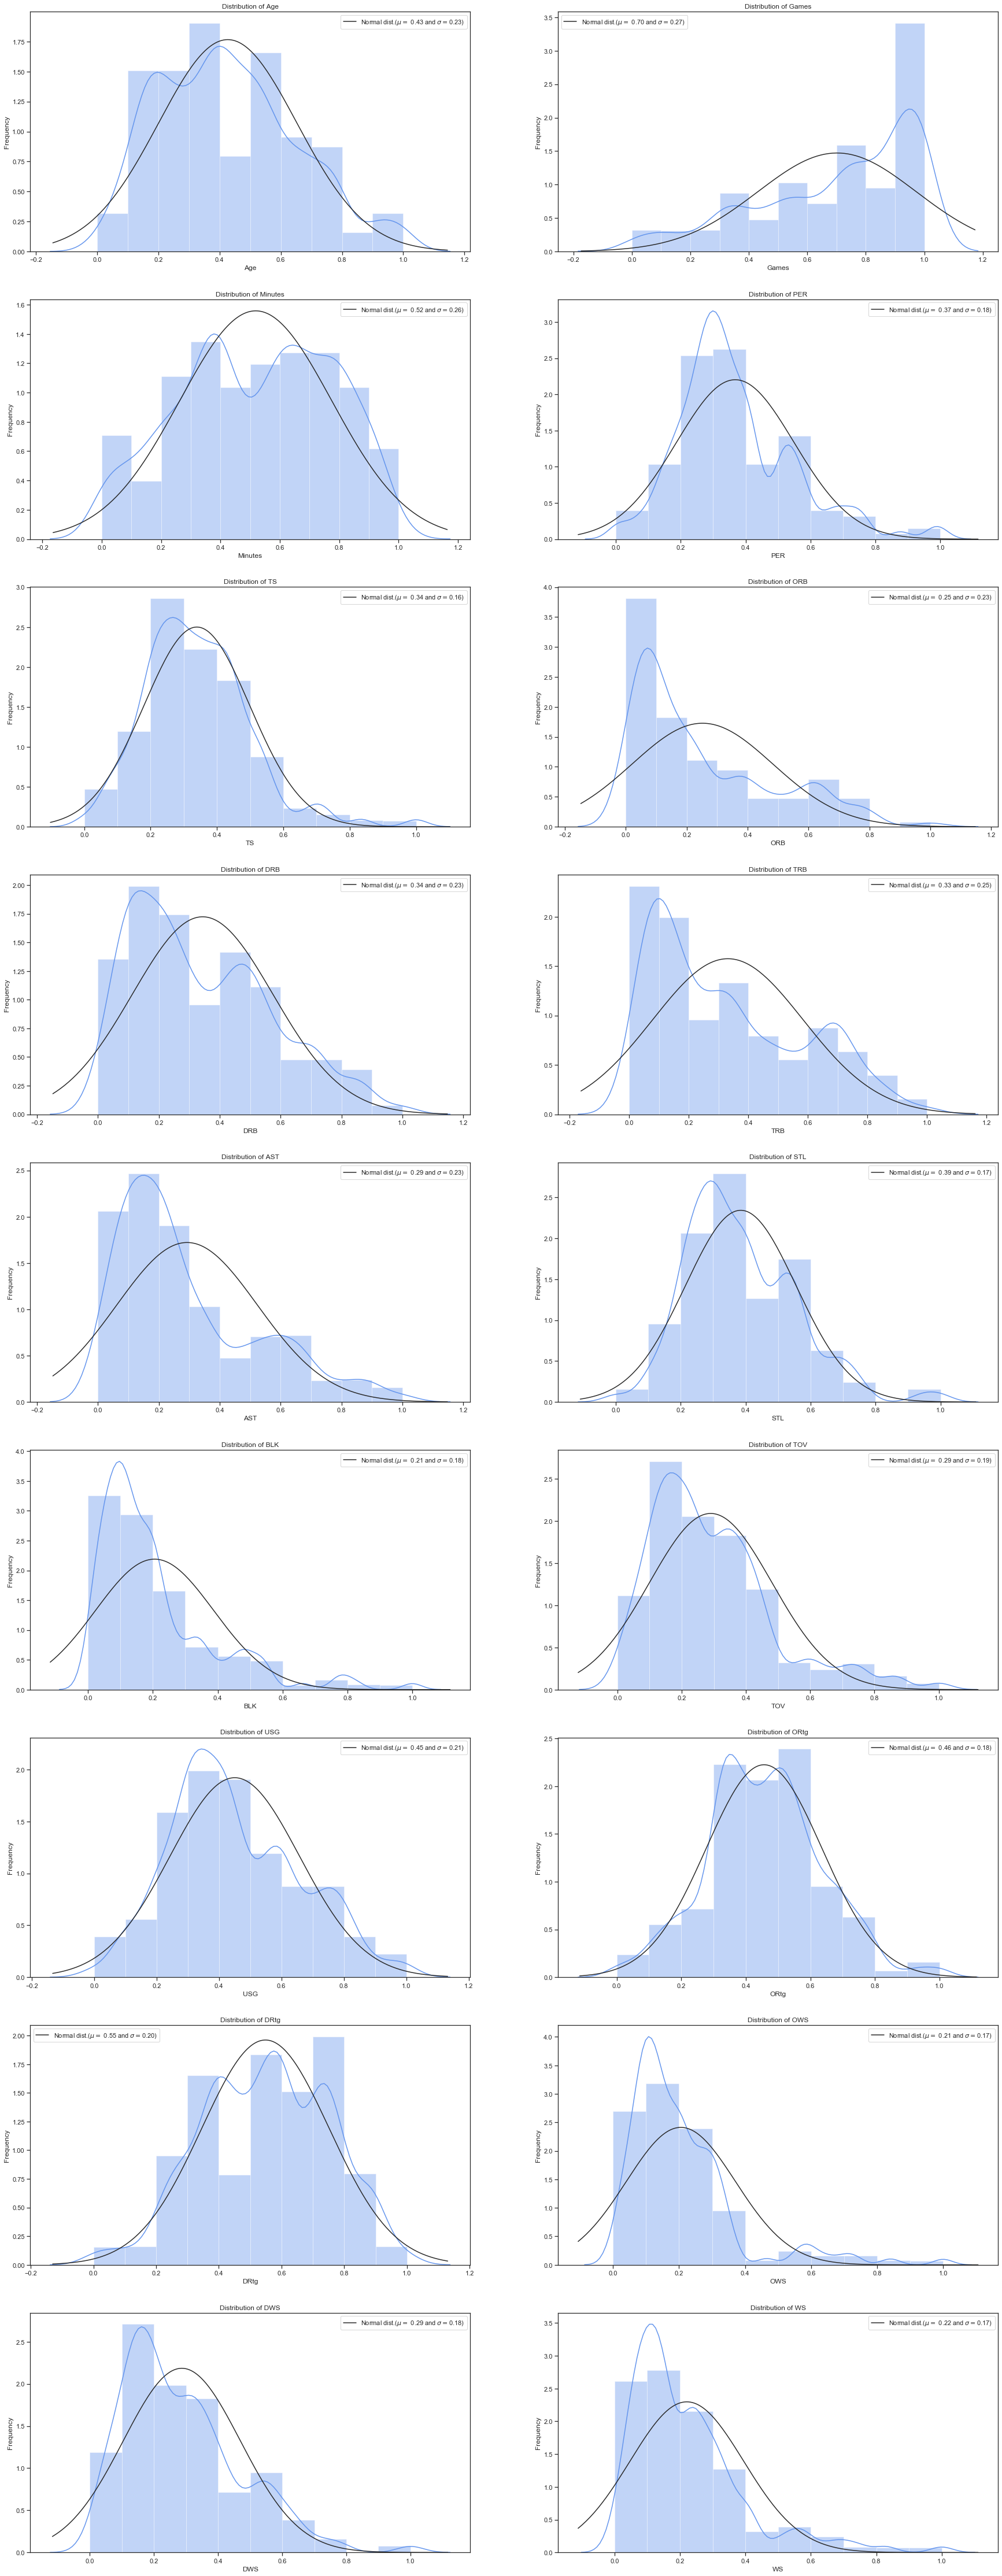

In [21]:
subplot_distributed(df_eda)

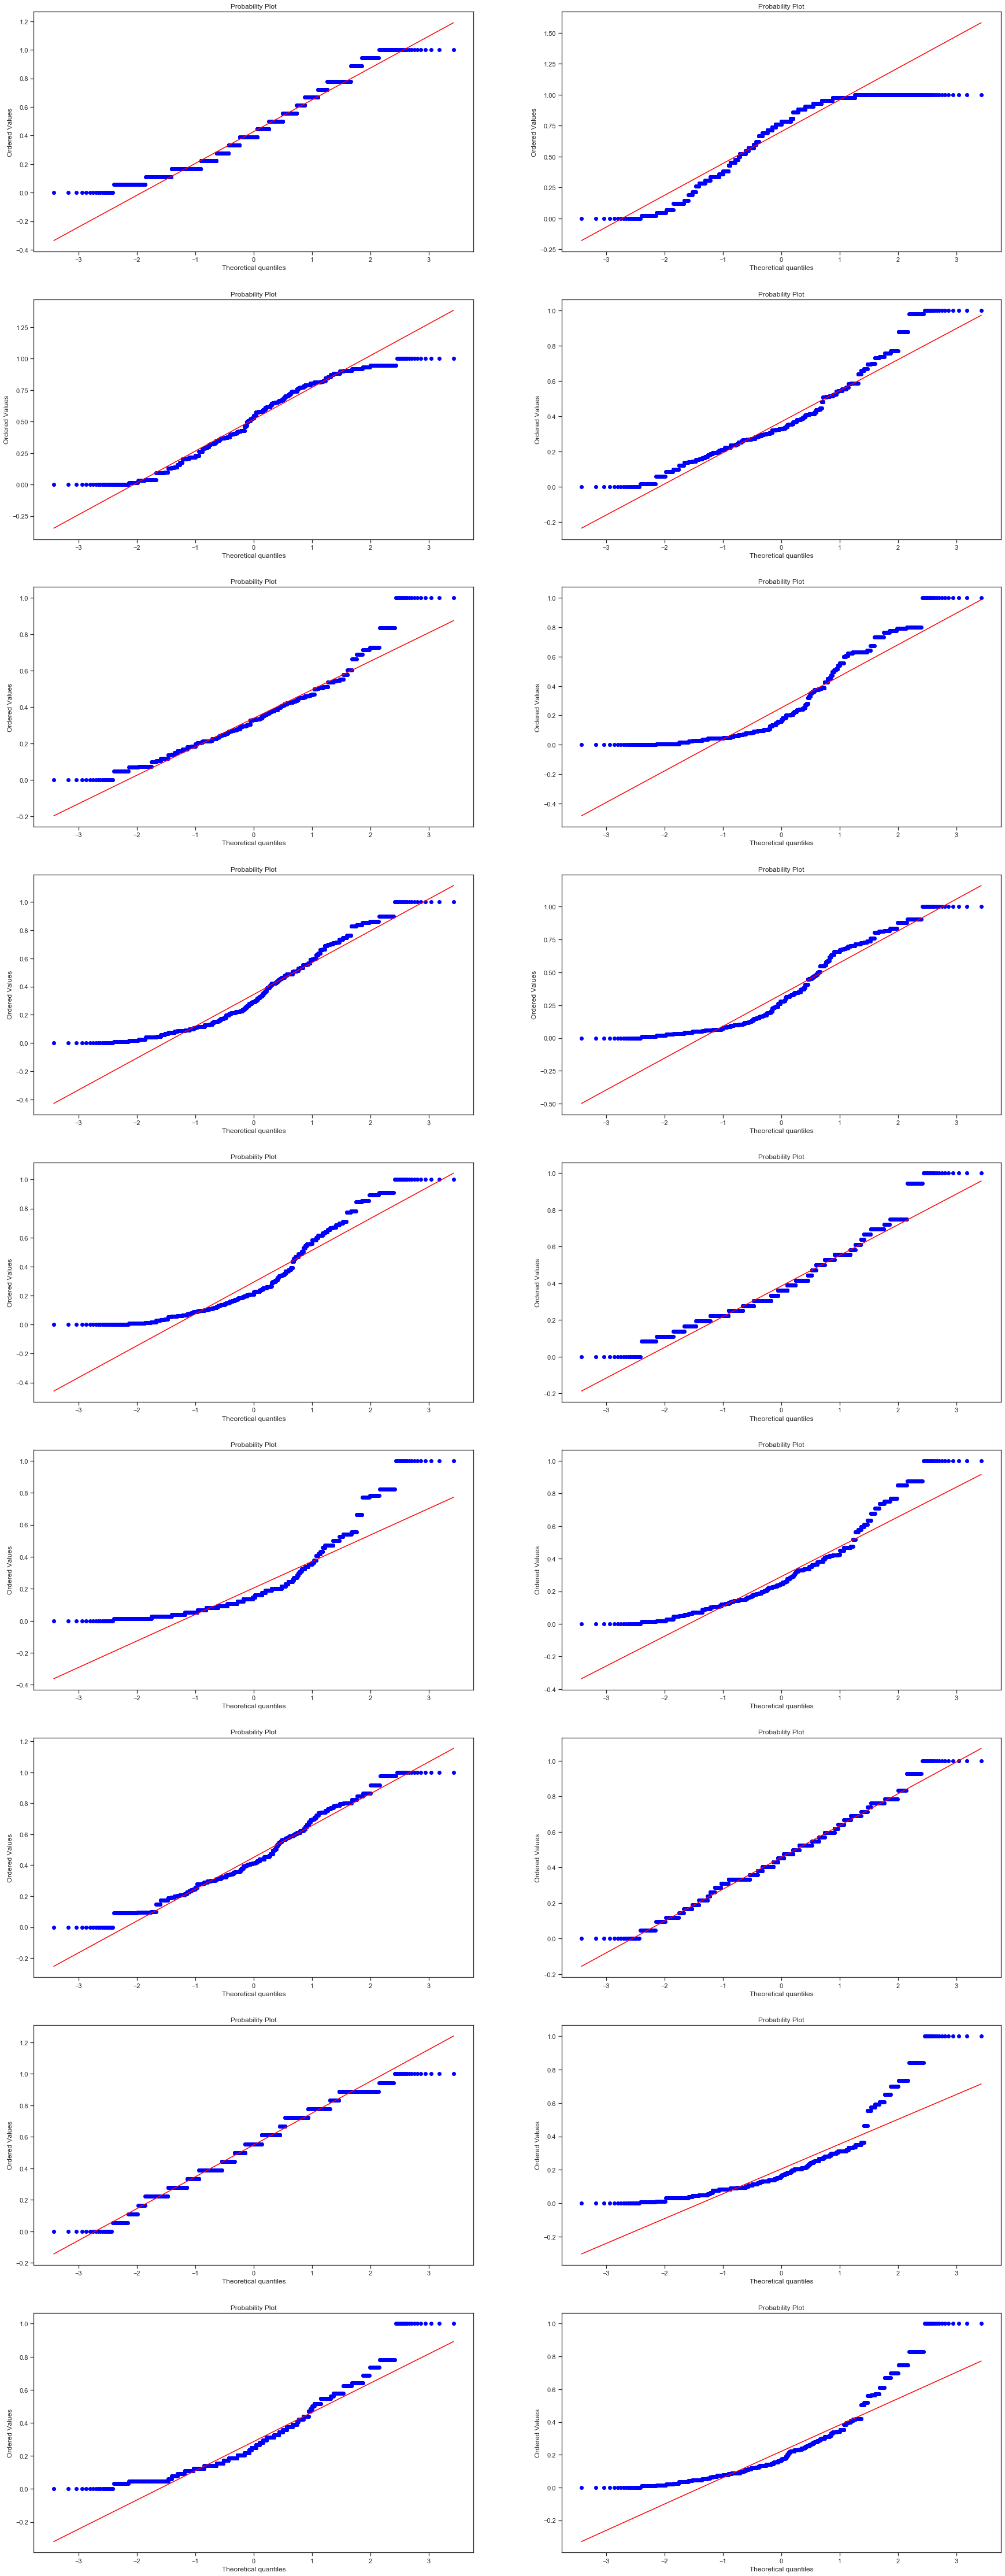

In [22]:
subplot_prob(df_eda)

In [23]:
skew_high_cols = ["ORB","AST","BLK","TOV","OWS","DWS","WS"]
for col in skew_high_cols:
    df_eda[col] = np.sqrt(df_eda[col])
    
skew_low_log = ["Games"]
for col in skew_low_log:
    df_eda[col] = df_eda[col] ** 2

In [24]:
get_status(df_eda)

,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000,2260.000
mean,0.427,0.566,0.519,0.368,0.339,0.446,0.344,0.331,0.496,0.385,0.414,0.509,0.451,0.457,0.549,0.422,0.507,0.437
std,0.226,0.330,0.256,0.181,0.160,0.230,0.232,0.253,0.215,0.170,0.184,0.177,0.208,0.179,0.203,0.165,0.173,0.174
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.222,0.274,0.326,0.260,0.225,0.258,0.151,0.104,0.341,0.250,0.285,0.385,0.300,0.333,0.389,0.309,0.375,0.305
50%,0.389,0.599,0.537,0.328,0.331,0.404,0.293,0.280,0.457,0.361,0.386,0.495,0.414,0.452,0.556,0.403,0.500,0.410
75%,0.556,0.862,0.738,0.447,0.430,0.618,0.506,0.549,0.659,0.500,0.507,0.620,0.591,0.571,0.722,0.517,0.625,0.543
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
median,0.389,0.599,0.537,0.328,0.331,0.404,0.293,0.280,0.457,0.361,0.386,0.495,0.414,0.452,0.556,0.403,0.500,0.410
mad,0.184,0.289,0.220,0.138,0.123,0.194,0.196,0.215,0.174,0.135,0.144,0.140,0.170,0.142,0.167,0.125,0.141,0.139


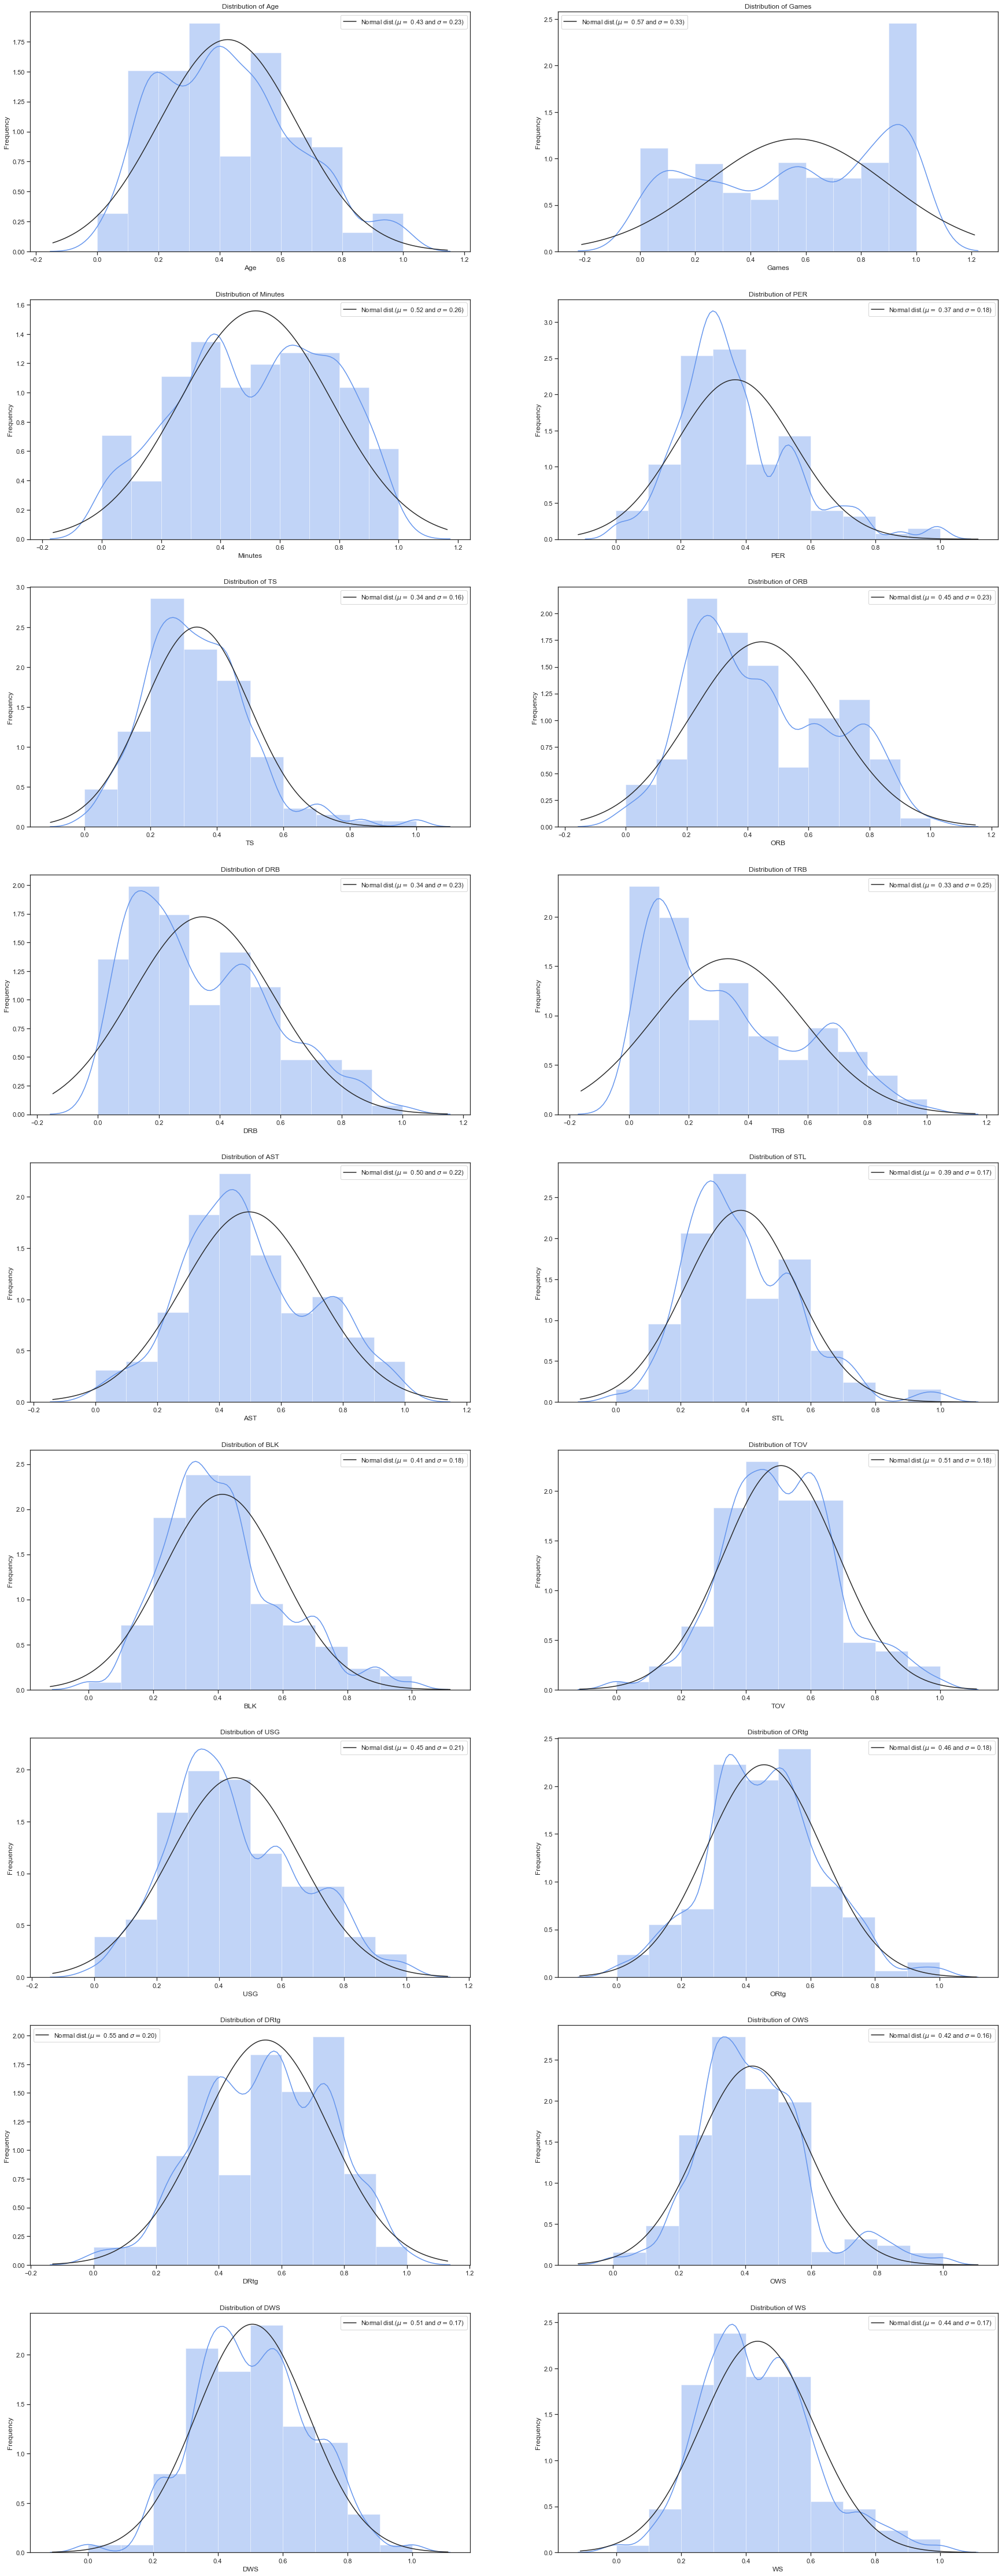

In [25]:
subplot_distributed(df_eda)

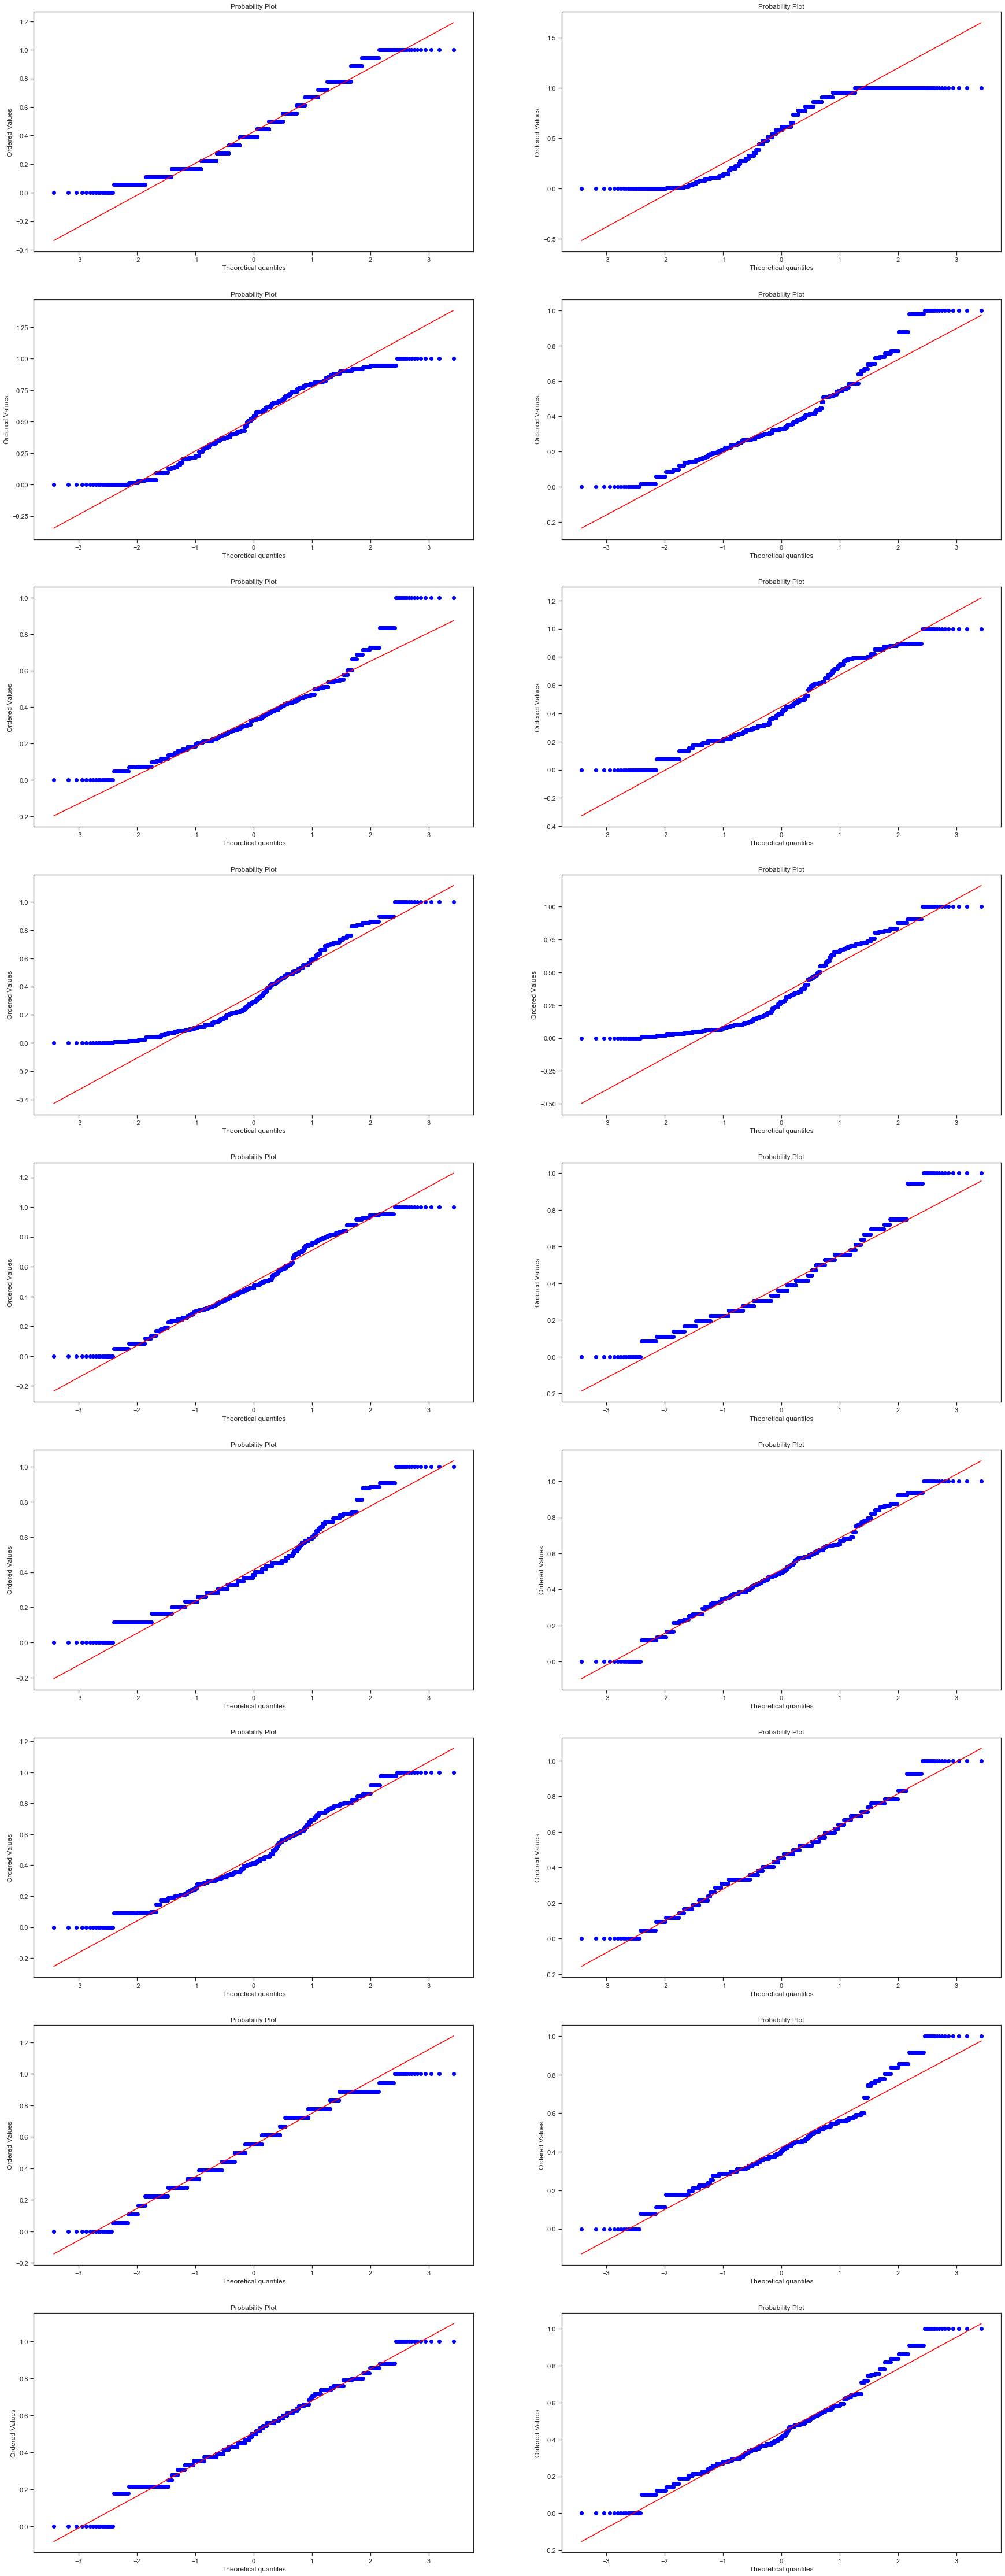

In [26]:
subplot_prob(df_eda)

Text(0.5, 1, 'Correlation Among Variables')

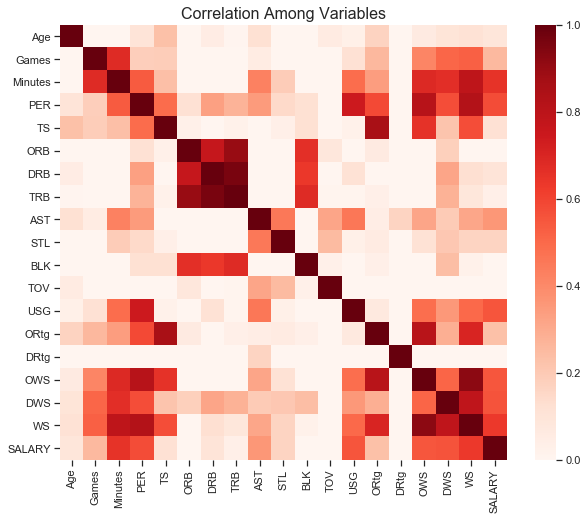

In [27]:
df_eda = pd.concat([df_eda,np.log(df["SALARY"])],axis=1)
plt.figure(figsize = (10,8))
sns.heatmap(df_eda.corr(), vmin = 0, vmax = 1, cmap = 'Reds')
plt.title('Correlation Among Variables', fontsize = 16)

In [28]:
print(abs(df_eda.corr()["SALARY"]).sort_values(ascending=False))

SALARY     1.000000
Minutes    0.656104
WS         0.634460
PER        0.581341
DWS        0.561057
USG        0.557689
OWS        0.551615
AST        0.361064
Games      0.254534
ORtg       0.231067
DRtg       0.192376
TOV        0.169826
STL        0.167100
TS         0.117819
DRB        0.102528
Age        0.092609
BLK        0.077618
ORB        0.056576
TRB        0.035939
Name: SALARY, dtype: float64


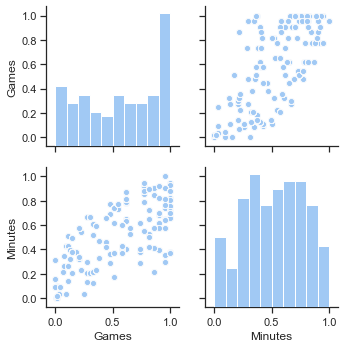

In [29]:
sns.pairplot(df_eda[["Games","Minutes"]])

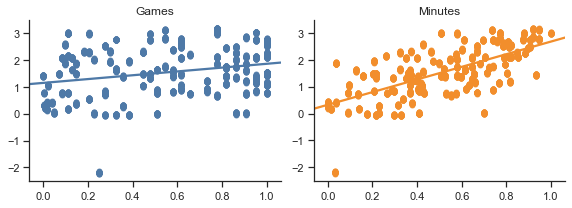

In [30]:
with sns.color_palette(crayon):
    plot_regressions(df_eda[["Games","Minutes"]], df_eda["SALARY"])
    plt.show()

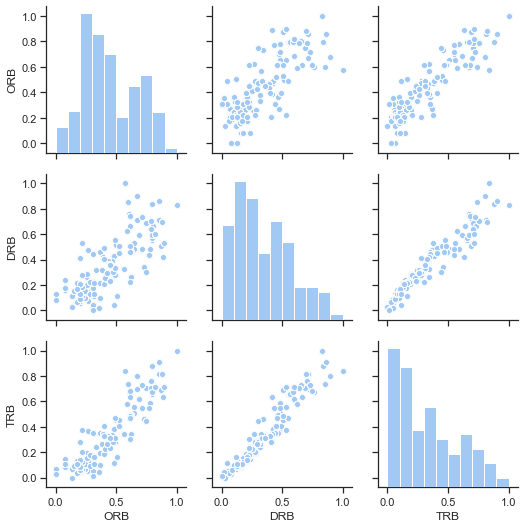

In [31]:
sns.pairplot(df_eda[["ORB","DRB","TRB"]])

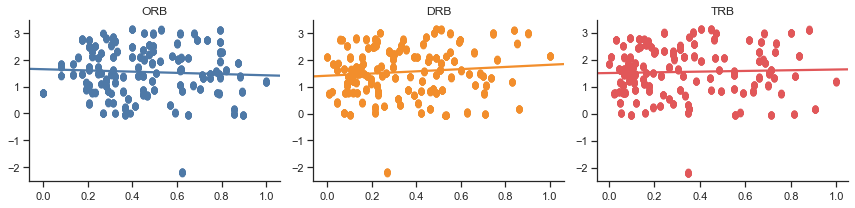

In [32]:
with sns.color_palette(crayon):
    plot_regressions(df_eda[["ORB","DRB","TRB"]], df_eda["SALARY"])
    plt.show()

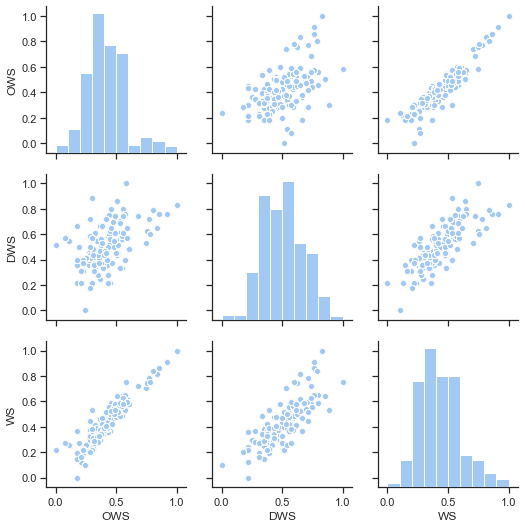

In [33]:
sns.pairplot(df_eda[["OWS","DWS","WS"]])

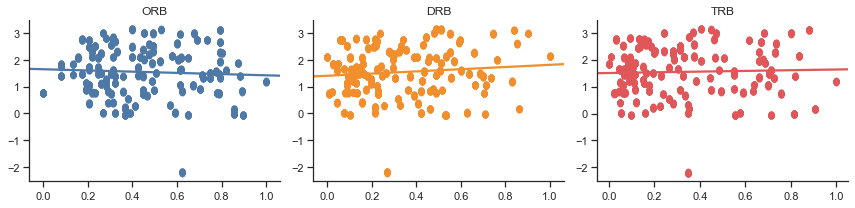

In [34]:
with sns.color_palette(crayon):
    plot_regressions(df_eda[["ORB","DRB","TRB"]], df_eda["SALARY"])
    plt.show()

### Category va

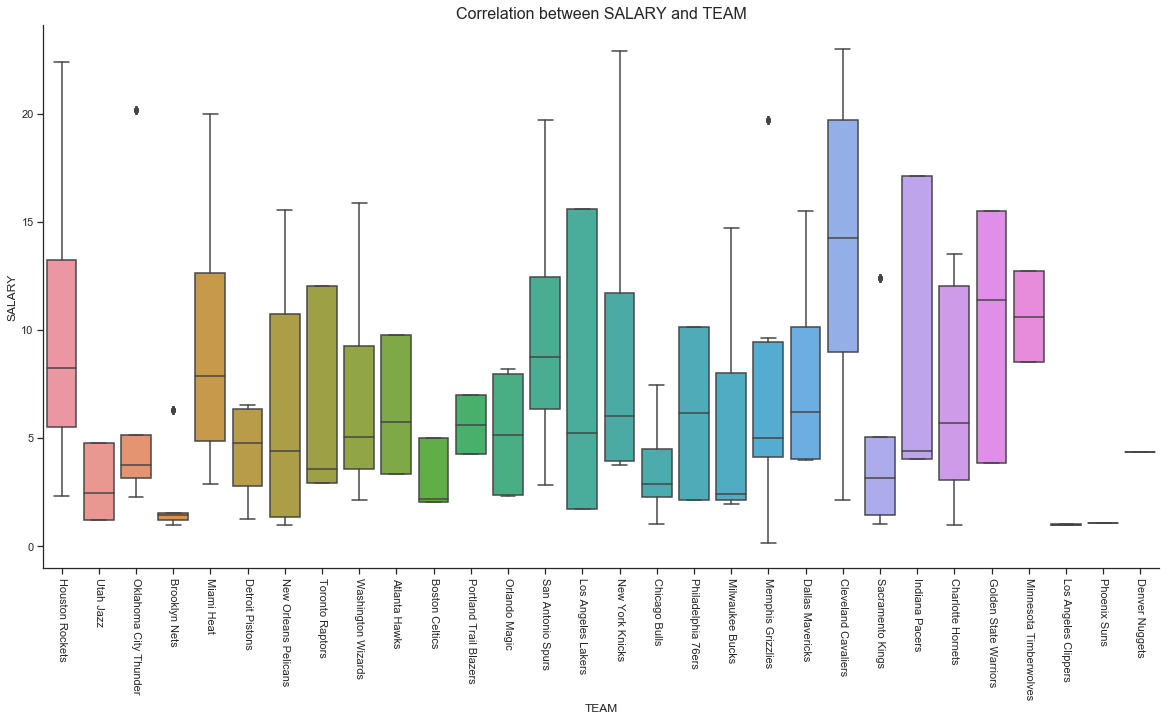

In [35]:
plt.figure(figsize=(20,10))
sns.set_palette("pastel")
sns.boxplot(x = 'TEAM', y = 'SALARY', data = df)
sns.despine()
plt.title('Correlation between SALARY and TEAM', fontsize = 16)
plt.xticks(rotation=270)
plt.show()

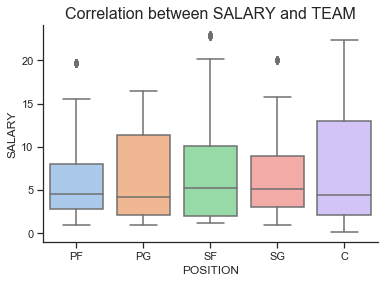

In [36]:
sns.set_palette("pastel")
sns.boxplot(x = 'POSITION', y = 'SALARY', data = df)
sns.despine()
plt.title('Correlation between SALARY and TEAM', fontsize = 16)
plt.show()

In [37]:
def fe_categorical_var(df, cols):
    d = pd.DataFrame()
    for col in cols:
        dummies = pd.get_dummies(
            df[col], prefix_sep="_", drop_first=True, prefix=col)
        #df.drop(columns=col, inplace=True)
        d = pd.concat([d, dummies], axis=1)

    return d


temp = pd.concat([fe_categorical_var(df, col_category),
                  df["SALARY"]], axis=1)

Text(0.5, 1, 'Correlation Among Variables')

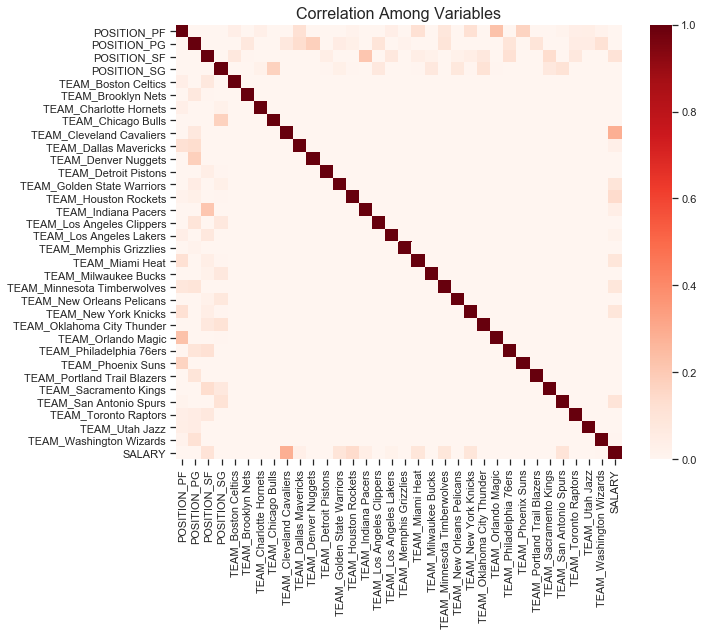

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(temp.corr(), vmin=0, vmax=1, cmap='Reds')
plt.title('Correlation Among Variables', fontsize=16)

In [39]:
print(abs(temp.corr()["SALARY"]).sort_values(ascending=False))

SALARY                         1.000000
TEAM_Cleveland Cavaliers       0.287179
TEAM_Brooklyn Nets             0.185181
TEAM_Houston Rockets           0.139998
TEAM_Los Angeles Clippers      0.131439
TEAM_Chicago Bulls             0.114707
TEAM_Utah Jazz                 0.109096
POSITION_SF                    0.107549
TEAM_San Antonio Spurs         0.104633
TEAM_Boston Celtics            0.103373
TEAM_Golden State Warriors     0.096616
TEAM_New York Knicks           0.093478
TEAM_Miami Heat                0.092873
TEAM_Phoenix Suns              0.091713
TEAM_Minnesota Timberwolves    0.086994
TEAM_Detroit Pistons           0.079191
TEAM_Sacramento Kings          0.078583
POSITION_PF                    0.068003
POSITION_PG                    0.062510
TEAM_Orlando Magic             0.051123
TEAM_Indiana Pacers            0.043508
TEAM_Oklahoma City Thunder     0.041003
TEAM_Denver Nuggets            0.038774
TEAM_Dallas Mavericks          0.038479
TEAM_Milwaukee Bucks           0.034057


## Feature engineering

In [40]:
def fe_target_var(df):
    return pd.DataFrame(np.log(df["SALARY"]))


def fe_numerical_var(df):

    df_number = normalized(df[col_number])
    for col in skew_high_cols:
        df_number[col] = np.sqrt(df_number[col])

    for col in skew_low_log:
        df_number[col] = df_number[col] ** 2

    df_number.drop(columns=["Games","TRB", "ORB",
                            "DWS", "OWS"], axis=1, inplace=True)

    return df_number


def fe_categorical_var(df, cols):
    d = pd.DataFrame()
    for col in cols:
        dummies = pd.get_dummies(
            df[col], prefix_sep="_", drop_first=True, prefix=col)
        #df.drop(columns=col, inplace=True)
        d = pd.concat([d, dummies], axis=1)

    return d


def feature_eng(df):
    return pd.concat(
        [fe_target_var(df), fe_numerical_var(df), fe_categorical_var(df, col_category)], axis=1)

In [41]:
df_engineered = feature_eng(df)
df_engineered

,SALARY,Age,Minutes,PER,TS,DRB,AST,STL,BLK,TOV,...,TEAM_Oklahoma City Thunder,TEAM_Orlando Magic,TEAM_Philadelphia 76ers,TEAM_Phoenix Suns,TEAM_Portland Trail Blazers,TEAM_Sacramento Kings,TEAM_San Antonio Spurs,TEAM_Toronto Raptors,TEAM_Utah Jazz,TEAM_Washington Wizards
0,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
1,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
2,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
3,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
4,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
5,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
6,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
7,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
8,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0
9,0.912094,0.166667,0.617442,0.544681,0.461268,0.474903,0.340755,0.305556,0.687730,0.215166,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# selected_features = []

## Modelling

In [43]:
X_train = df_engineered.iloc[:,1:]
y_train = df_engineered["SALARY"]

In [44]:
# df_engineered.columns

In [45]:
df_test = feature_eng(pd.read_csv("NBA_Test.csv"))
df_test['TEAM_Houston Rockets'] = 0
df_test = df_test[df_engineered.columns]

X_test = df_test.iloc[:,1:]
y_test = df_test["SALARY"]

### Lasso

In [46]:
alpha = list(np.logspace(-4, -.5, 30))

lasso = LassoCV(cv=5, random_state=0, alphas=alpha)

lasso.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.00013203517797162948, 0.00017433288221999874,
                0.00023018073130224678, 0.0003039195382313198,
                0.0004012807031942776, 0.0005298316906283707,
                0.0006995642156712634, 0.0009236708571873865,
                0.0012195704601594415, 0.0016102620275609393,
                0.0021261123338996556, 0.0028072162039411755,
                0.0037065129109221566, 0.004893900918477494,
                0.006461670787466...
                0.02592943797404667, 0.03423597957607583, 0.04520353656360245,
                0.05968456995122311, 0.07880462815669913, 0.10404983103657853,
                0.1373823795883264, 0.1813930693911063, 0.2395026619987486,
                0.31622776601683794],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
        verbose=False)

In [47]:
lasso.alpha_

0.0196382800192977

In [48]:
lasso.coef_

array([ 0.        ,  1.5991355 ,  0.41286088, -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.77751707,
        0.        , -0.13625684,  0.        ,  0.        , -0.08626994,
       -0.        , -0.        ,  0.        , -0.02219161,  0.        ,
       -0.0107481 ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.04761385,  0.        , -0.        , -0.        ,
        0.        ])

In [49]:
y_pred = lasso.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))

4.397392155220531

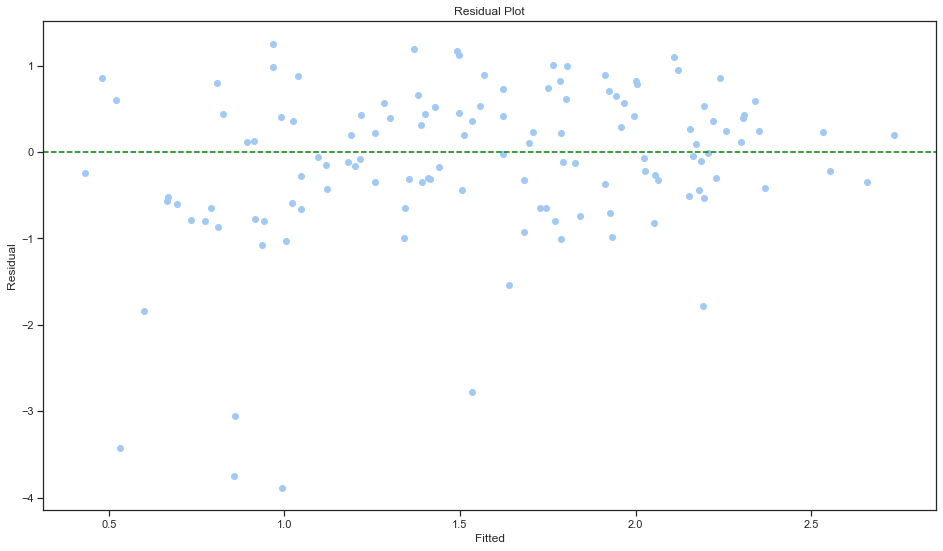

In [51]:
def plot_resid(y_test, y_pred):
    """
    
    """
    
    resid = y_test-y_pred
    
    plt.figure(figsize = (16,9))
    plt.scatter(y_pred,resid)
    plt.axhline(0,0,1, color="g", ls="--")
    plt.xlabel("Fitted")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.savefig("Residual plot ols")
    plt.show()
    
plot_resid(y_test, y_pred)

### Gradient Boosting

In [52]:
tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [250, 500, 750, 1000, 1500],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gb = RandomizedSearchCV(GradientBoostingRegressor(), tuning_parameters, n_iter=1, cv=10, return_train_score=False, n_jobs=4)
gb.fit(X_train, y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 750, 'max_depth': 2, 'learning_rate': 0.01} 



In [53]:
gb_best = gb.best_estimator_

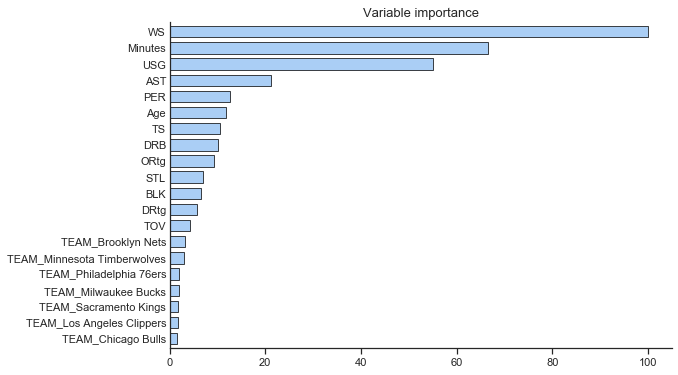

In [54]:
from statlearning import plot_feature_importance

plot_feature_importance(gb.best_estimator_, list(X_train))
plt.show()

In [55]:
y_pred= gb.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))

4.164307992574648

In [57]:
toc = time.time()
print("Training time: {0:.4f}s".format(toc - tic))

Training time: 50.3632s
